In [1]:
text ='평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique)

token2idx = {}
for i in range(len(unique)):
    token2idx[unique[i]] = i
    
encode = [token2idx[x] for x in tokens]
encode




[2, 4, 8, 9, 6, 7, 5, 3, 8, 0, 1]

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

text ='평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


In [3]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i] - 1):
            temp.append(1)
            
        else:
            temp.append(0)
            
    one_hot.append(temp)
    
np.array(one_hot)



array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [5]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [9]:
num_words = 1000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)



(25000,)
(25000,)
(25000,)
(25000,)


In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [11]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [12]:
for i in range(10):
    if y_train[i] == 0:
        label = '부정'
        
    else:
        label = '긍정'
        
    print('{}\n{}'.format(x_train[i], label))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [16]:
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [18]:
print(len(x_train[1]))
print(len(pad_x_train[1]))
      

189
100


In [19]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

In [20]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [22]:
history = model.fit(pad_x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 12s 12ms/step - loss: 0.5593 - acc: 0.7174 - val_loss: 0.4160 - val_acc: 0.8108
Epoch 2/10
625/625 [==============================] - 8s 12ms/step - loss: 0.3719 - acc: 0.8371 - val_loss: 0.3821 - val_acc: 0.8280
Epoch 3/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3357 - acc: 0.8551 - val_loss: 0.3931 - val_acc: 0.8210
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3092 - acc: 0.8688 - val_loss: 0.3842 - val_acc: 0.8276
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2794 - acc: 0.8838 - val_loss: 0.3952 - val_acc: 0.8216
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2463 - acc: 0.9029 - val_loss: 0.4049 - val_acc: 0.8210
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 0.2127 - acc: 0.9205 - val_loss: 0.4214 - val_acc: 0.8158
Epoch 8/10
625/625 [==============================] - 7s 12ms/step

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [24]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

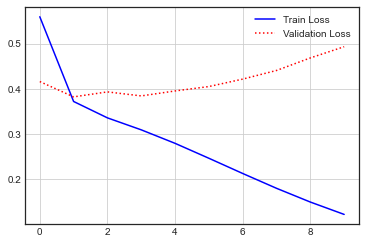

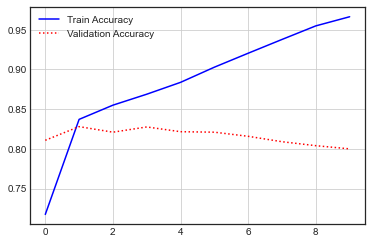

In [27]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

In [28]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4865 - acc: 0.8053


[0.4864918291568756, 0.8053200244903564]

In [29]:
num_words = 2000
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

pad_x_train_2 =pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 =pad_sequences(x_test, maxlen=max_len, padding='pre')



In [31]:
print(x_train[0])
print(pad_x_train_2[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [38]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [40]:
history2 = model.fit(pad_x_train_2, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 8s 12ms/step - loss: 0.4878 - acc: 0.7571 - val_loss: 0.3290 - val_acc: 0.8640
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 0.2787 - acc: 0.8858 - val_loss: 0.3057 - val_acc: 0.8692
Epoch 3/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2299 - acc: 0.9090 - val_loss: 0.3099 - val_acc: 0.8698
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1886 - acc: 0.9285 - val_loss: 0.3103 - val_acc: 0.8752
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.1480 - acc: 0.9489 - val_loss: 0.3308 - val_acc: 0.8706
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.1100 - acc: 0.9664 - val_loss: 0.3551 - val_acc: 0.8674
Epoch 7/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0794 - acc: 0.9768 - val_loss: 0.3755 - val_acc: 0.8642
Epoch 8/10
625/625 [==============================] - 8s 12ms/step -

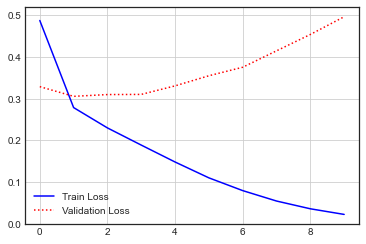

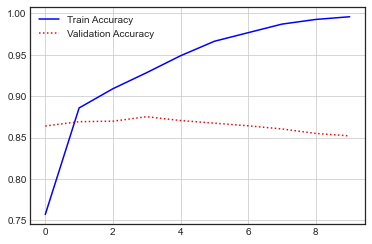

In [41]:
hist_dict2 = history2.history
hist_dict2.keys()

plt.plot(hist_dict2['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict2['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict2['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict2['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

plt.show()

In [43]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4913 - acc: 0.8498


[0.49133336544036865, 0.8497599959373474]

In [46]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

documents = dataset.data

print(len(documents))
documents[3]


11314


'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [52]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)


11314

In [54]:
news_df.replace('',float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))


11096


In [55]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [56]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [57]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()


In [58]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))


10991


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [74]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = news_texts, window=4, size=100, min_count=5, workers=4, sg=1)

In [75]:
model.wv.similarity('man', 'woman')

0.8516034

In [76]:
model.most_similar(positive=['soldiers'])

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wounded', 0.9288685321807861),
 ('azerbaijanis', 0.9249004125595093),
 ('fighting', 0.9246525764465332),
 ('murdered', 0.9111734628677368),
 ('azeri', 0.9040002822875977),
 ('survivors', 0.9027367830276489),
 ('civilians', 0.9020901322364807),
 ('villages', 0.901381254196167),
 ('refugees', 0.900695264339447),
 ('brutally', 0.900395393371582)]

In [77]:
model.wv.most_similar(positive=['man','soldiers'], negative=['woman'])

[('civilians', 0.8331887722015381),
 ('fighters', 0.8204769492149353),
 ('germans', 0.8197689652442932),
 ('babies', 0.8165792226791382),
 ('murders', 0.8147071003913879),
 ('israelis', 0.8136177062988281),
 ('arafat', 0.8106160163879395),
 ('warsaw', 0.8084337115287781),
 ('arabs', 0.8048437833786011),
 ('wars', 0.8046310544013977)]

In [78]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = news_texts, window=4, size=100, min_count=5, workers=4, sg=1)

In [79]:
model.wv.similarity('man', 'woman')

0.82988095

In [80]:
model.most_similar(positive=['soldiers'])

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('azerbaijanis', 0.9313268065452576),
 ('wounded', 0.9258422255516052),
 ('villages', 0.9153395891189575),
 ('corpses', 0.9093369245529175),
 ('murdered', 0.9024524688720703),
 ('refugees', 0.9020146131515503),
 ('fighting', 0.9015743732452393),
 ('greeks', 0.9002212285995483),
 ('raped', 0.8990256786346436),
 ('troops', 0.8986713886260986)]

In [81]:
model.wv.most_similar(positive=['man','soldiers'], negative=['woman'])

[('israelis', 0.8604593873023987),
 ('saints', 0.8434478640556335),
 ('murders', 0.8319861888885498),
 ('babies', 0.8308345079421997),
 ('fete', 0.8287448287010193),
 ('jew', 0.8263281583786011),
 ('palestineans', 0.8257348537445068),
 ('claimed', 0.8251265287399292),
 ('moslems', 0.825096845626831),
 ('murder', 0.8240126371383667)]

In [82]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('news_w2v')

In [88]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2022-02-28 18:17:49,680 - word2vec2tensor - INFO - running C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\gensim\scripts\word2vec2tensor.py -i news_w2v -o news_w2v
2022-02-28 18:17:49,680 - utils_any2vec - INFO - loading projection weights from news_w2v
2022-02-28 18:17:50,920 - utils_any2vec - INFO - loaded (22174, 100) matrix from news_w2v
2022-02-28 18:17:52,301 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2022-02-28 18:17:52,301 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2022-02-28 18:17:52,304 - word2vec2tensor - INFO - finished running word2vec2tensor.py


'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
